# 1. Background

Start Mart is a well-known supermarket chain that provides various products, ranging from fruits, meats, fish, sweets, wines, and gold. To make it easier for their customers, they offer channels for shopping through offline stores, web stores, and catalog stores.

Start Mart also has a membership program that offers many benefits for customers in the form of points and discounts. Through this program, they can also collect information about the customer.

Over the past two years, Start Mart has held various promotional campaigns to attract customer interest and boost their sales. However, Start Mart has realized that the sales levels did not reach their target expectations.

Based on the customer membership data recorded for the past two years, Star Mart wants to further analyze their Customer Segmentation and formulate a strategy for their next campaign, determining which channel of purchase they should prioritize.

## 1.1 Problems

- Customer Segmentation by their demographic
- Campaign Targeting
- Channel of use.

# 2. Data Understanding and Cleaning

## 2.1 Loading Data

It is found that in data each row is merged into one line and when we load the data, each column is seperated by \t.

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy import stats
import missingno

In [235]:
df = pd.read_csv('Data/Supermarket Customers.csv')
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t04-09-2012\t58\t635\t88\t546\t172\t88\t88\t3\t8\t10\t4\t7\t0\t0\t0\t0\t0\t0\t3\t11\t1
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t08-03-2014\t38\t11\t1\t6\t2\t1\t6\t2\t1\t1\t2\t5\t0\t0\t0\t0\t0\t0\t3\t11\t0
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\t21-08-2013\t26\t426\t49\t127\t111\t21\t42\t1\t8\t2\t10\t4\t0\t0\t0\t0\t0\t0\t3\t11\t0
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\t10-02-2014\t26\t11\t4\t20\t10\t3\t5\t2\t2\t0\t4\t6\t0\t0\t0\t0\t0\t0\t3\t11\t0
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2014\t94\t173\t43\t118\t46\t27\t15\t5\t5\t3\t6\t5\t0\t0\t0\t0\t0\t0\t3\t11\t0


To handle this, we use `sep='\t'` to seperate each column

In [236]:
df = pd.read_csv('Data/Supermarket Customers.csv', sep='\t')

## 2.2 Data Understanding

This dataset shows information related to the customers past 2 years history purchases in StarMart which can be categorized into people/customer, products, promotion, places and there's 2 columns which is a constant value and uncategorized. There is 29 columns Supermarket Customers dataset :

People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

Constant Value
- Z_CostContact: Cost of contacting the customer (constant value).
- Z_Revenue: Revenue generated from contacting the customer (constant value).

In [237]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Showing each unique values for each column

In [239]:
pd.set_option('display.max_colwidth', None)

unique = []
for i in df.columns :
    unique.append( [i, df[i].nunique(), df[i].unique()])

show = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique)
show

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

There's an anomaly in the categories of the column: 
- `Marital_Status` where there is an anomaly which is Absurd, YOLO and Alone.
- `Income` There is missing values in the column Income.
- `Dt_Customer` column data type is object where it should've been date time

## 2.3 Data Cleaning

### Dt_Customer


Changing Dt_Customer data type from object into datetime

In [240]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

In [241]:
asd = df.sort_values('Dt_Customer')
display(asd.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1255,6653,1970,PhD,Married,55158.0,1,1,2012-07-30,72,293,...,7,0,0,0,0,0,0,3,11,1
1363,6181,1950,2n Cycle,Together,52203.0,0,0,2012-07-31,36,488,...,6,0,0,0,0,0,0,3,11,0
2029,10001,1985,2n Cycle,Together,7500.0,1,0,2012-08-01,98,5,...,9,0,0,0,0,0,0,3,11,0
724,4692,1976,Graduation,Married,7500.0,1,0,2012-08-01,19,7,...,9,1,0,0,0,0,0,3,11,1
976,2611,1959,Master,Together,82576.0,0,0,2012-08-01,66,1206,...,1,0,0,1,0,0,0,3,11,0


### Assuming The Timeframe

In [242]:
display(df['Dt_Customer'].max(),
df['Dt_Customer'].min())

Timestamp('2014-06-29 00:00:00')

Timestamp('2012-07-30 00:00:00')

In [243]:
df[df['Dt_Customer'] == '2014-06-29']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
200,7300,1952,Graduation,Divorced,69142.0,0,1,2014-06-29,50,448,...,5,0,1,0,0,0,0,3,11,0
989,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,27,...,5,0,0,0,0,0,0,3,11,0


The data that we have was the evaluation of sales for the past 2 years, and the last customer enroll was on 2014-06-29.

The recency of one of the customer is quite high. With this, we can assume that the date is nearing the end of the year or it has pass to the next year.

### Marital_Status

The data where Marital_Status is Absurd, YOLO, and Alone can be considered as Single since people with a proper marital status would not consider any jokes on their marital status

In [244]:
df['Marital_Status'].value_counts()/df['Marital_Status'].count()*100

Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: count, dtype: float64

In [245]:
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd','YOLO','Alone'],'Single')
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

### Missing Values

Showing the percentage of missing values in each columns

In [246]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

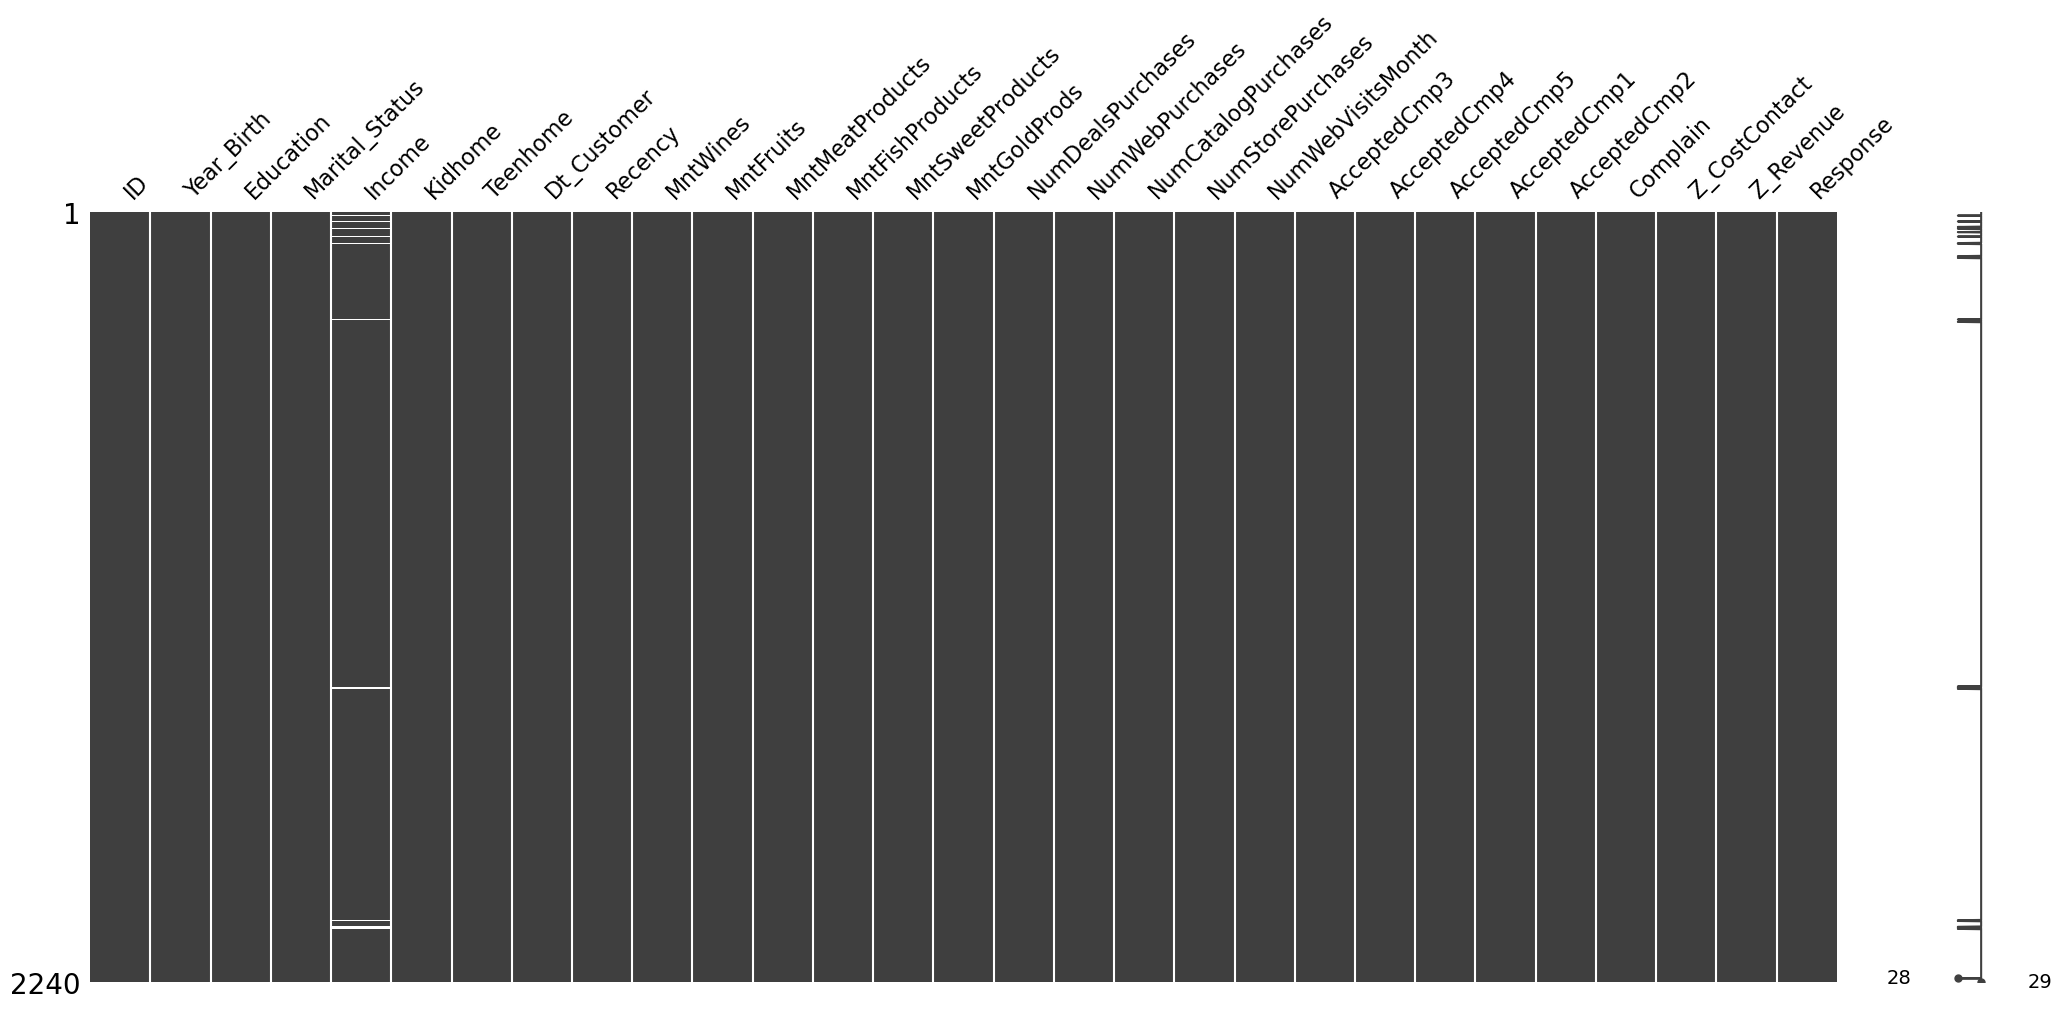

In [247]:
missingno.matrix(df)

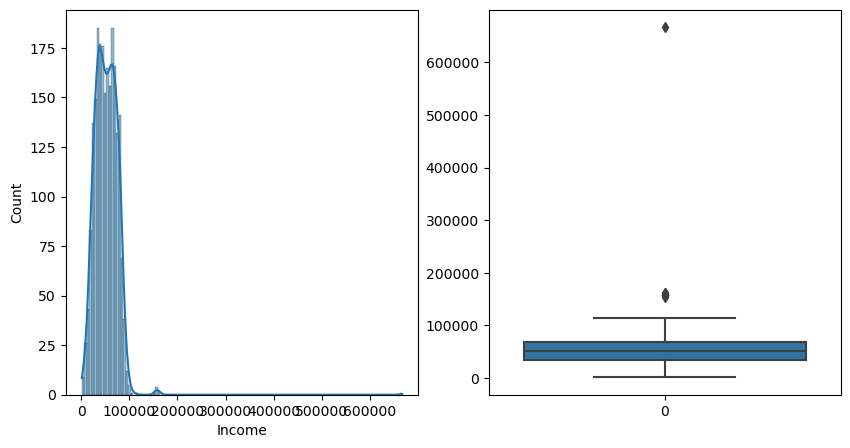

In [248]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df[df['Income'].notnull()]['Income'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df[df['Income'].notnull()]['Income'])

plt.show()

In [249]:
normaltest(df[~df['Income'].isna()]['Income'])

NormaltestResult(statistic=2943.373569541277, pvalue=0.0)

Income data which has missing value is not normally distributed and there seems to be outliers which makes the data to be right skewed.

We can try to remove the outliers from the data to check if the data without the outliers is normally distributed.

In [250]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [251]:
# Assuming 'df' is your DataFrame
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

df_no_outliers = df[~((df['Income'] < (Q1_income - 1.5 * IQR_income)) | (df['Income'] > (Q3_income + 1.5 * IQR_income)))]

df_no_outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


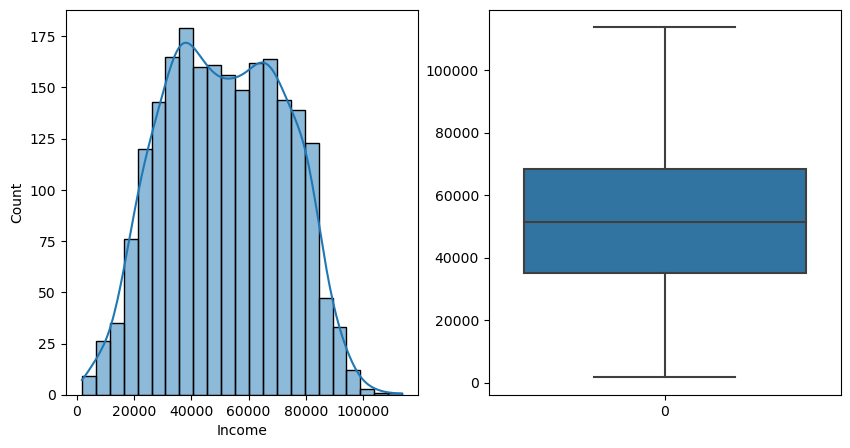

In [252]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df_no_outliers[df_no_outliers['Income'].notnull()]['Income'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df_no_outliers[df_no_outliers['Income'].notnull()]['Income'])

plt.show()

In [253]:
normaltest(df_no_outliers[~df_no_outliers['Income'].isna()]['Income'])

NormaltestResult(statistic=231.54588203992873, pvalue=5.2535220730746056e-51)

After the outliers is filtered out, we can see that the data is almost normalised in histogram and boxplot, but after we did the normal test, it is found that the data is still not normal.

With this, we can conclude that we can fill the missing values with median.

We will be filling the missing value by the median based on their education.

In [254]:
# Calculating the median of each education level

median = df.groupby('Education')['Income'].transform('median')

In [255]:
df['Income'].fillna(median, inplace=True)

In [256]:
df['Income'].isna().sum()/df.shape[0]*100

0.0

### Check for duplicates

In [257]:
display(df.duplicated().sum(),df['ID'].duplicated().sum())

0

0

There is no duplicated data in this dataset

### Removing Unnecessary Columns

The column `Z_CostContact` and `Z_Revenue` have a constant value and is unnecessary for the analysis.

In [258]:
df.drop(columns=['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

## 2.4 Data Wrangling

### Age Group

Grouping of age according to their generation for customer segmentation. The grouping of generetions will be done based on this article

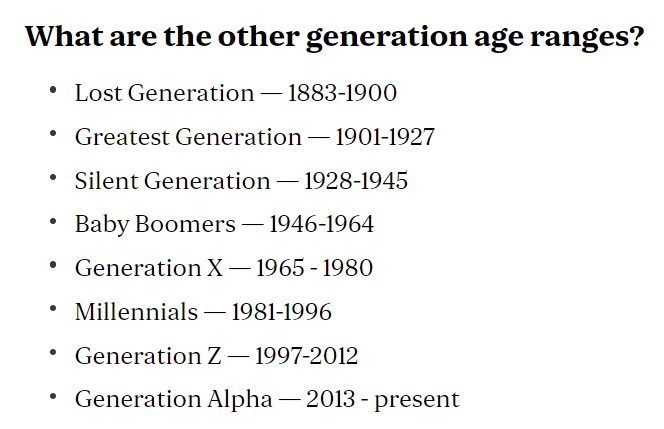

Source : https://www.standard.co.uk/news/uk/which-age-range-who-generation-z-millennial-boomer-zoomer-b1073540.html

In [259]:
display(df['Year_Birth'].max(),
df['Year_Birth'].min())

1996

1893

In [260]:
def generation(year):
    if year <= 1900:
        return 'Lost Generation'
    elif 1901 <= year <= 1927:
        return 'Greatest Generation'
    elif 1928 <= year <= 1945:
        return 'Silent Generation'
    elif 1946 <= year <= 1964:
        return 'Baby Boomers'
    elif 1965 <= year <= 1980:
        return 'Generation X'
    elif 1981 <= year <= 1996:
        return 'Millennials'
    elif 1997 <= year <= 2012:
        return 'Generation Z'
    elif 2013 <= year:
        return 'Generation Alpha'

In [261]:
df['Generation'] = df['Year_Birth'].apply(generation)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,Baby Boomers
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,Baby Boomers
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,Generation X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,Millennials
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,Millennials


In [262]:
df['Generation'].value_counts()

Generation
Generation X         1069
Baby Boomers          759
Millennials           385
Silent Generation      24
Lost Generation         3
Name: count, dtype: int64

### Income Group

Grouping the income for customer segmentation

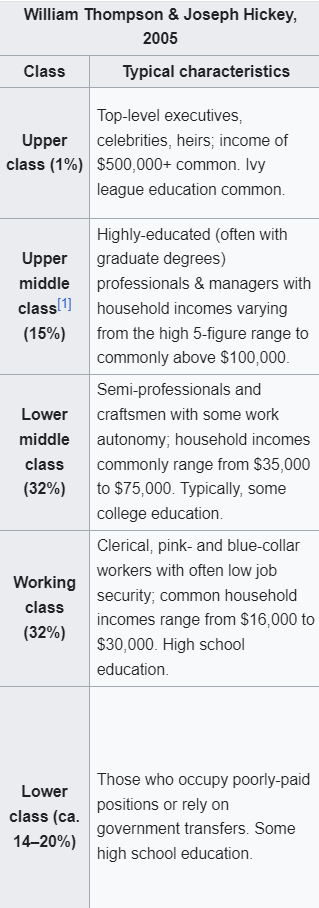

Source : https://en.wikipedia.org/wiki/Household_income_in_the_United_States

In [263]:
def income_category(income) :
    if income <= 16000:
        return 'Lower Class'
    elif income <= 30000:
        return 'Working Class'
    elif income < 75000:
        return 'Lower Middle Class'
    elif income <= 100000:
        return 'Upper Middle Class'
    elif income <= 500000:
        return 'Upper Class'
    else :
        return 'Anomaly'

In [264]:
df['Income_Group'] = df['Income'].apply(income_category)

In [265]:
df['Income_Group'].value_counts()

Income_Group
Lower Middle Class    1511
Upper Middle Class     346
Working Class          305
Lower Class             65
Upper Class             12
Anomaly                  1
Name: count, dtype: int64

In [266]:
df[df['Income_Group'] == 'Anomaly']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation,Income_Group
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,0,Generation X,Anomaly


It seems that there is an anomaly in income data. We will excluding the row that have the anomaly and will be focused in the group that we have made.

In [267]:
df = df[df['Income_Group'] != 'Anomaly']
df['Income_Group'].value_counts()

Income_Group
Lower Middle Class    1511
Upper Middle Class     346
Working Class          305
Lower Class             65
Upper Class             12
Name: count, dtype: int64

### Parent Group

Grouping of the customer who has child/children

In [268]:
def parent(data):
    if (data['Kidhome'] + data['Teenhome']) > 0:
        return 'Parent'
    else:
        return 'Not a Parent'

In [269]:
df['Parent'] = df.apply(parent, axis=1)

In [270]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation,Income_Group,Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,Baby Boomers,Lower Middle Class,Not a Parent
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,Baby Boomers,Lower Middle Class,Parent
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,Generation X,Lower Middle Class,Not a Parent
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,Millennials,Working Class,Parent
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,Millennials,Lower Middle Class,Parent


### Past Campaign Participation

Assigning labes to the customer that have participated in any of the past campaign

In [271]:
def past_campaign_participation(data):
    if any(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']]):
        return 'Accepted'
    else:
        return 'Rejected'

In [272]:
df['Past_Campaign_Participation'] = df.apply(past_campaign_participation, axis=1)

In [273]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation,Income_Group,Parent,Past_Campaign_Participation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,Baby Boomers,Lower Middle Class,Not a Parent,Accepted
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,Baby Boomers,Lower Middle Class,Parent,Rejected
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,Generation X,Lower Middle Class,Not a Parent,Rejected
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,Millennials,Working Class,Parent,Rejected
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,Millennials,Lower Middle Class,Parent,Rejected


## 2.5 Clean Data

In [274]:
pd.set_option('display.max_colwidth', None)

unique = []
for i in df.columns :
    unique.append( [i, df[i].nunique(), df[i].unique()])

show = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique)
show

,Column Name,Number of Unique,Unique Sample
0,ID,2239,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,5,"[Single, Together, Married, Divorced, Widow]"
4,Income,1975,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 52028.5, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 55212.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 46805.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 50943.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06-20 00:00:00, 201

Exporting clean data to csv

In [275]:
df.to_csv('clean_star_mart.csv', index=False)

# 3. Data Analysis

## Campaign Participation

### Participation Rate All Past Campaign

Firstly, we will summarize the participation rate of each campaign to check if the campaign is effective

In [276]:
total_participation = df['Past_Campaign_Participation'].value_counts()
total_participation

Past_Campaign_Participation
Rejected    1630
Accepted     609
Name: count, dtype: int64

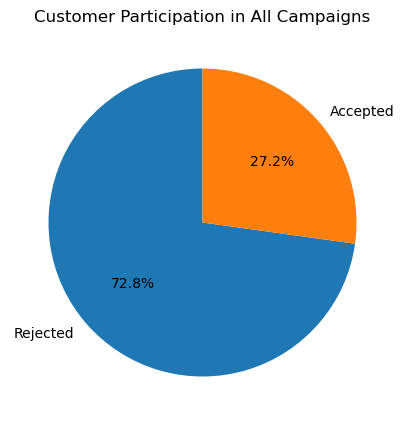

In [277]:
plt.figure(figsize=(5, 5))

plt.pie(total_participation, labels=total_participation.index, autopct='%1.1f%%', startangle=90)

plt.title('Customer Participation in All Campaigns')
plt.show()  

Only 27% of customers had ever participated in the campaign.

### Participation Rate Each Past Campaign

Check the participation rate of each past campaign

In [278]:
# Creating a summary DataFrame by applying value_counts to each column
campaign_summary = pd.DataFrame({
    'Campaign1': df['AcceptedCmp1'].value_counts(),
    'Campaign2': df['AcceptedCmp2'].value_counts(),
    'Campaign3': df['AcceptedCmp3'].value_counts(),
    'Campaign4': df['AcceptedCmp4'].value_counts(),
    'Campaign5': df['AcceptedCmp5'].value_counts(),
    'CampaignLast': df['Response'].value_counts()
})
display(campaign_summary)
campaign_summary = campaign_summary/df.shape[0] * 100
campaign_summary

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,CampaignLast
0,2095,2209,2076,2072,2076,1905
1,144,30,163,167,163,334


,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,CampaignLast
0,93.568557,98.660116,92.719964,92.541313,92.719964,85.082626
1,6.431443,1.339884,7.280036,7.458687,7.280036,14.917374


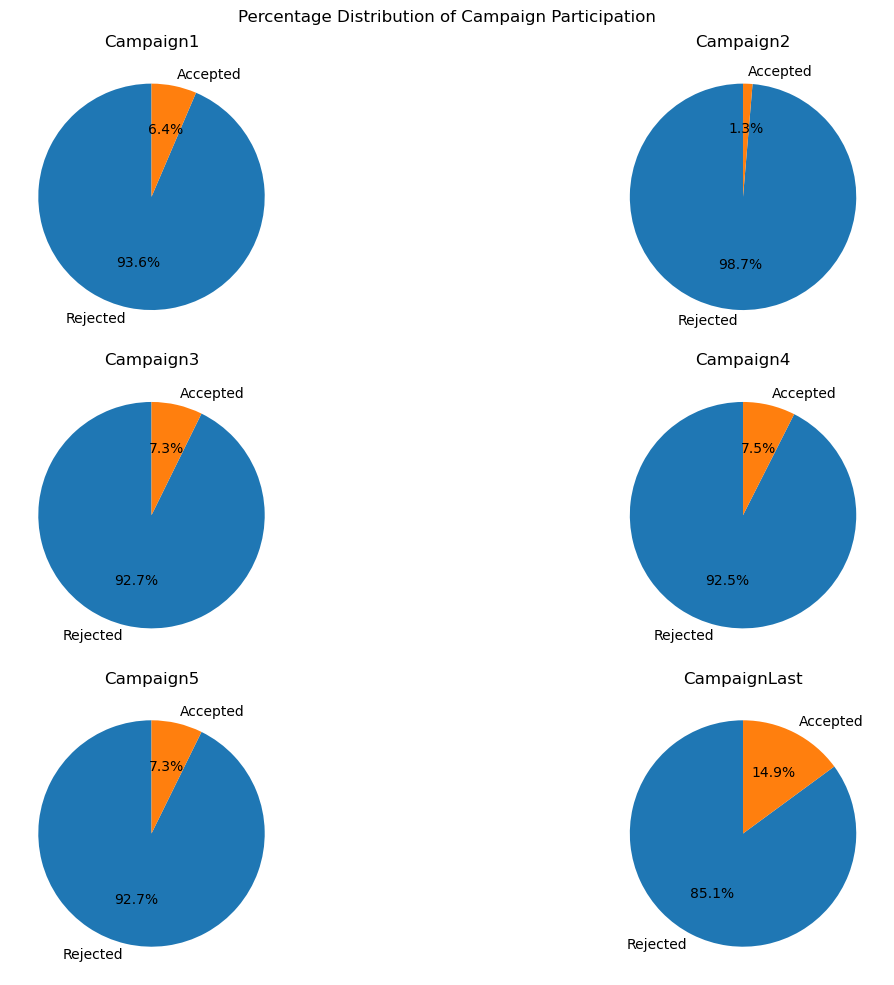

In [279]:
# Plotting pie charts for each campaign
plt.figure(figsize=(15, 10))
plt.suptitle('Percentage Distribution of Campaign Participation')

# Plotting each campaign
columns = campaign_summary.columns
for i in range(len(columns)):
    plt.subplot(3, 2, i + 1)
    plt.pie(campaign_summary[columns[i]], labels=['Rejected','Accepted'], autopct='%1.1f%%', startangle=90)
    plt.title(f'{columns[i]}')

# Adjusting layout
plt.tight_layout()

# Displaying the pie charts
plt.show()

The acceptance rate of each campaign is very low with an average of 7% and the highest was the last campaign which is 15%.

This could mean that the targeting of the campaign is inaccurate with the customer demographic

## Campaign Demographic

First, we make a function to count each column

In [280]:
def generate_crosstab_stats(column_name):
    # Generate crosstab for each AcceptedCmp and Response
    ctWhole = pd.crosstab(index=df[column_name], columns=df['Past_Campaign_Participation']).reset_index().rename({'Rejected': 'Rej', "Accepted": 'Acc'}, axis=1)
    
    # Calculate the total count for each 'column_name'
    total_count = df[column_name].value_counts().reset_index(name='Total')

    # Merge the 'AccWhole' crosstab and total count
    ct = ctWhole.merge(total_count, 'inner', column_name)
    ct = ct[[column_name, 'Acc', 'Total']]

    return ct

Next we make a function to plot the piechart

In [281]:
def plot_participation_rate(column_name):
    # Sorting the dataframe by the specified column percentage in descending order
    result_sorted = result.sort_values(by=column_name, ascending=False)

    # Plotting the bar chart
    plt.figure(figsize=(5, 5))
    plt.bar(result_sorted[column_name], (result_sorted['Acc'] / result_sorted['Total']) * 100)
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.title(f'Participation Rate Each {column_name} (Sorted)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(range(0, 101, 20))

    # Displaying values in each bar
    for i in range(len(result_sorted[column_name])):
        category = result_sorted[column_name].iloc[i]
        percentage = (result_sorted['Acc'].iloc[i] / result_sorted['Total'].iloc[i]) * 100
        plt.text(category, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

### Generation

In [282]:
generationCount = df['Generation'].value_counts()
generationCount

Generation
Generation X         1068
Baby Boomers          759
Millennials           385
Silent Generation      24
Lost Generation         3
Name: count, dtype: int64

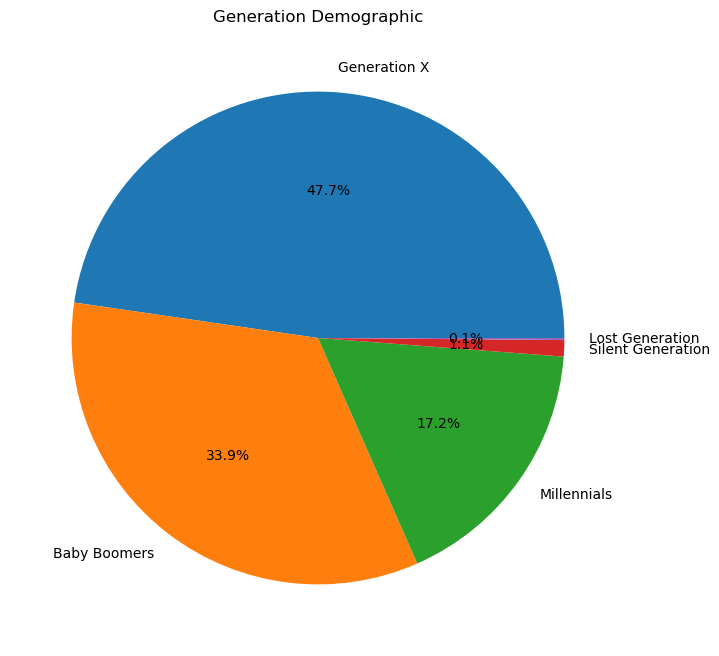

In [283]:
plt.figure(figsize=(8, 8))
plt.pie(generationCount, labels=generationCount.index, autopct='%1.1f%%')
plt.title('Generation Demographic')
plt.show()

Out of all generation, Most customer comes from `Generation X` Which is **48%**

In [284]:
result = generate_crosstab_stats('Generation')
result

,Generation,Acc,Total
0,Baby Boomers,221,759
1,Generation X,257,1068
2,Lost Generation,1,3
3,Millennials,119,385
4,Silent Generation,11,24


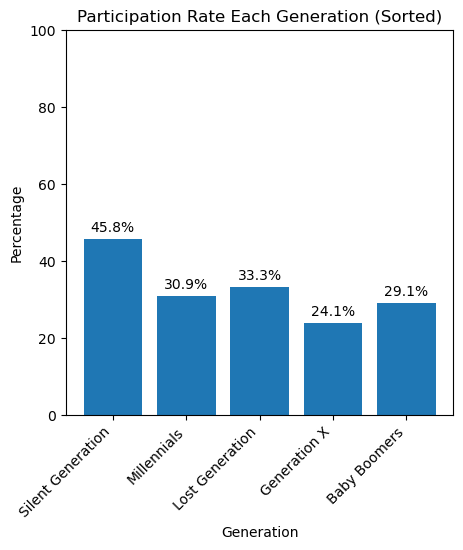

In [285]:
plot_participation_rate('Generation')

`Silent Gneration` has the highest participation rate with 46%

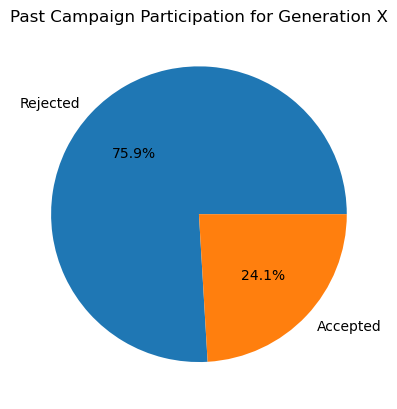

In [286]:
participation_counts = df[df['Generation'] == 'Generation X']['Past_Campaign_Participation'].value_counts()

plt.pie(participation_counts, labels=participation_counts.index, autopct='%1.1f%%')
plt.title('Past Campaign Participation for Generation X')
plt.show()

Only **24%** of people from `Generation X` had participated in the campaign

### Education Demographic

In [287]:
education = df['Education'].value_counts()
education

Education
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

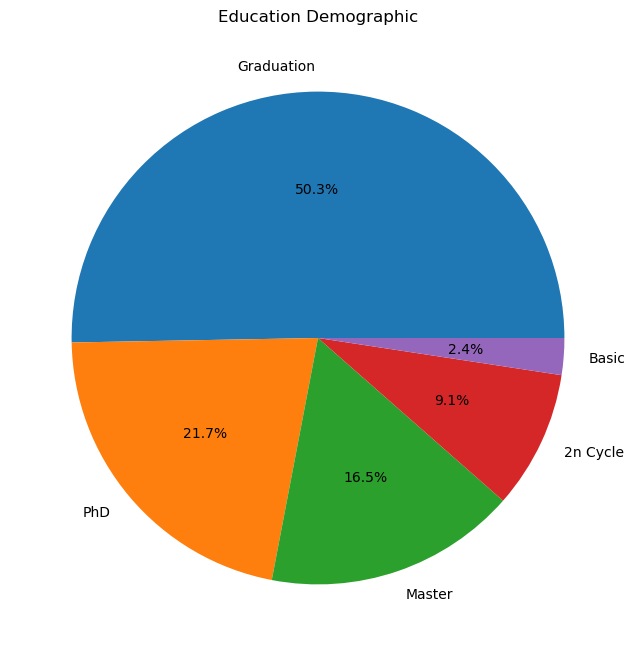

In [288]:
plt.figure(figsize=(8, 8))
plt.pie(education, labels=education.index, autopct='%1.1f%%')
plt.title('Education Demographic')
plt.show()

Out of all Education, Most customer comes from `Graduation` which is **50%**

In [289]:
result = generate_crosstab_stats('Education')
result

,Education,Acc,Total
0,2n Cycle,46,203
1,Basic,7,54
2,Graduation,298,1126
3,Master,100,370
4,PhD,158,486


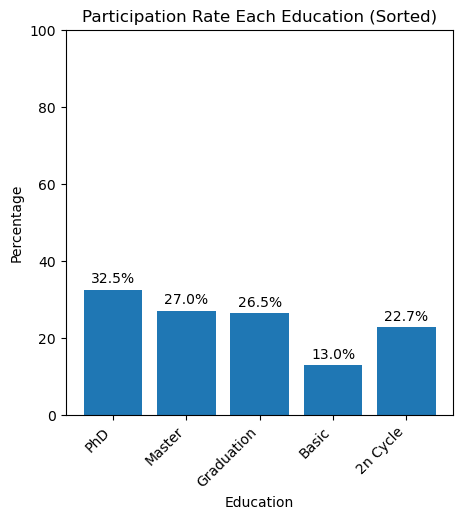

In [290]:
plot_participation_rate('Education')

`PhD` has the highest participation rate with 33%

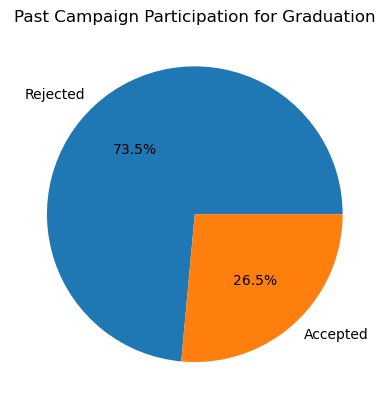

In [291]:
participation_counts = df[df['Education'] == 'Graduation']['Past_Campaign_Participation'].value_counts()

plt.pie(participation_counts, labels=participation_counts.index, autopct='%1.1f%%')
plt.title('Past Campaign Participation for Graduation')
plt.show()

Only **27%** of people from `Graduation` had participated in the campaign

### Marital Demographic

In [292]:
marital = df['Marital_Status'].value_counts()
marital

Marital_Status
Married     864
Together    579
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

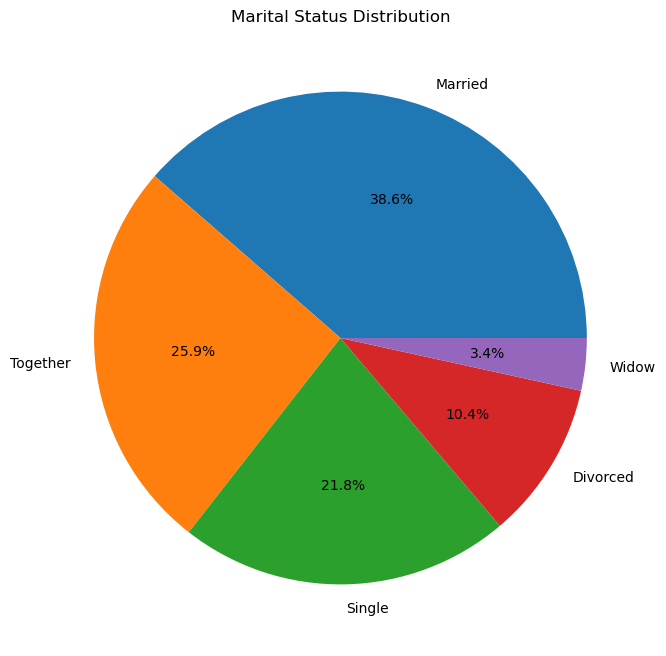

In [293]:
plt.figure(figsize=(8, 8))
plt.pie(marital, labels=marital.index, autopct='%1.1f%%', startangle=0)
plt.title('Marital Status Distribution')
plt.show()

Out of all Marital Status, Most customer comes from `Married` and `Together`.

Here we can see a similarity between these two groups which is they are a couple. we can combine the two into couples which combines into **65%**

In [294]:
result = generate_crosstab_stats('Marital_Status')
result

,Marital_Status,Acc,Total
0,Divorced,69,232
1,Married,217,864
2,Single,151,487
3,Together,145,579
4,Widow,27,77


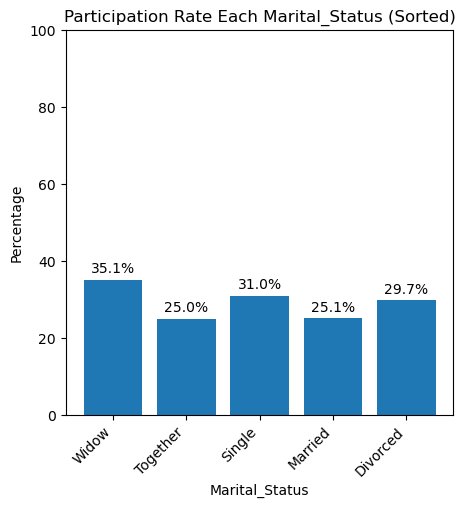

In [295]:
plot_participation_rate('Marital_Status')

`Widow` has the highest participation rate with 35%

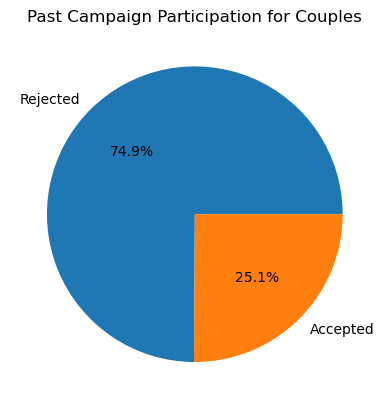

In [296]:
participation_counts = df[(df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Together')]['Past_Campaign_Participation'].value_counts()

plt.pie(participation_counts, labels=participation_counts.index, autopct='%1.1f%%')
plt.title('Past Campaign Participation for Couples')
plt.show()

Only 25% of people from `Couples` had participated in the campaign

### Income Group Demographic

In [297]:
income_group = df['Income_Group'].value_counts()
income_group

Income_Group
Lower Middle Class    1511
Upper Middle Class     346
Working Class          305
Lower Class             65
Upper Class             12
Name: count, dtype: int64

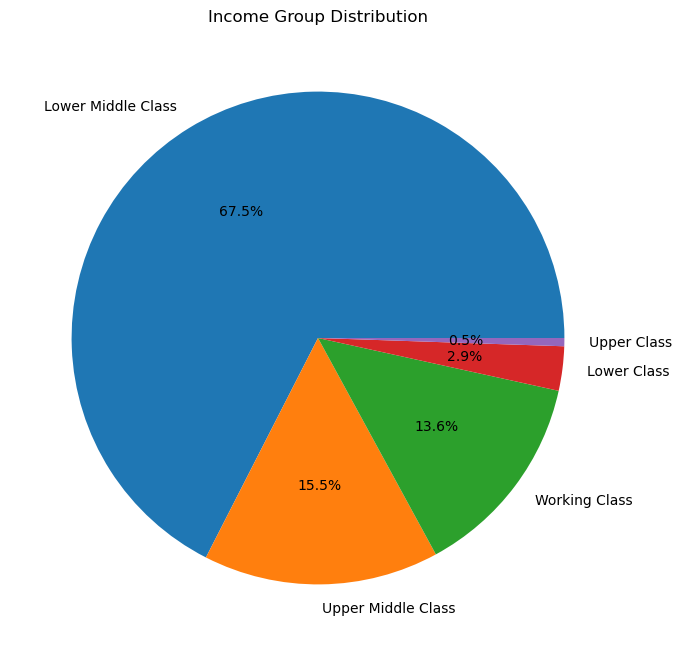

In [298]:
plt.figure(figsize=(8, 8))
plt.pie(income_group, labels=income_group.index, autopct='%1.1f%%', startangle=0)
plt.title('Income Group Distribution')
plt.show()

Out of all Income Group, Most customer comes from `Lower Middle Class` which is **68%**

In [299]:
result = generate_crosstab_stats('Income_Group')
result

,Income_Group,Acc,Total
0,Lower Class,12,65
1,Lower Middle Class,345,1511
2,Upper Class,4,12
3,Upper Middle Class,208,346
4,Working Class,40,305


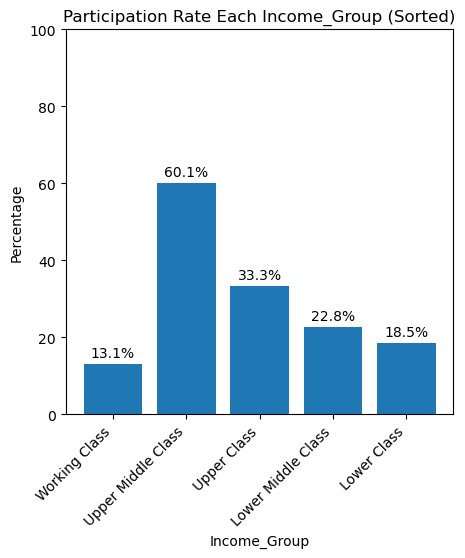

In [300]:
plot_participation_rate('Income_Group')

`Upper Middle Class` has the highest participation rate with 60%

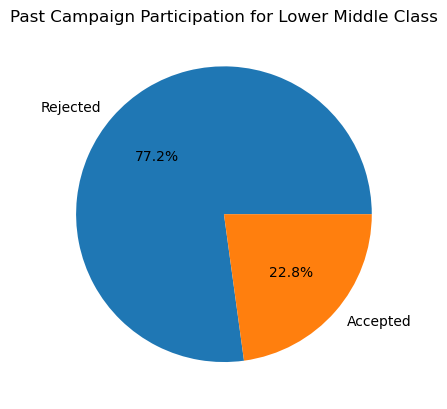

In [301]:
participation_counts = df[df['Income_Group'] == 'Lower Middle Class']['Past_Campaign_Participation'].value_counts()

plt.pie(participation_counts, labels=participation_counts.index, autopct='%1.1f%%')
plt.title('Past Campaign Participation for Lower Middle Class')
plt.show()

Only 23% of people from `Lower Middle Class` had participated in the campaign

### Parent Demographic

In [302]:
parent = df['Parent'].value_counts()
parent

Parent
Parent          1601
Not a Parent     638
Name: count, dtype: int64

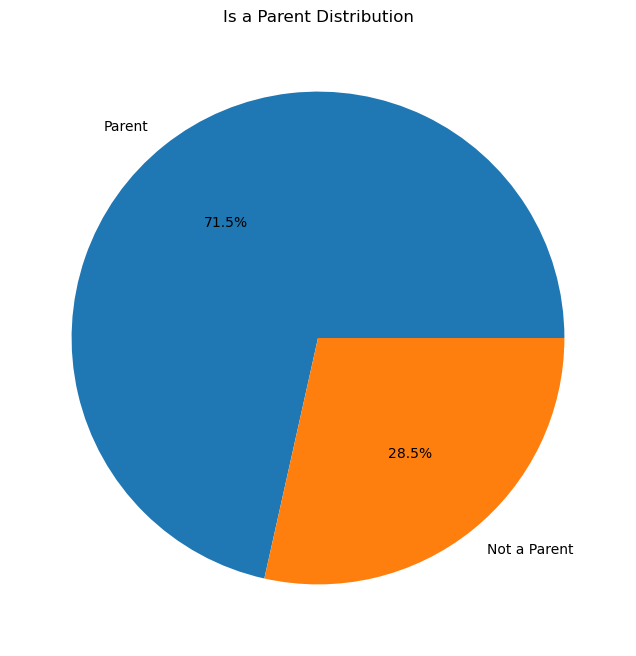

In [303]:
plt.figure(figsize=(8, 8))
plt.pie(parent, labels=parent.index, autopct='%1.1f%%', startangle=0)
plt.title('Is a Parent Distribution')
plt.show()

Most Customers are a `Parent` which is **72%** out of all customers

In [304]:
result = generate_crosstab_stats('Parent')
result

,Parent,Acc,Total
0,Not a Parent,285,638
1,Parent,324,1601


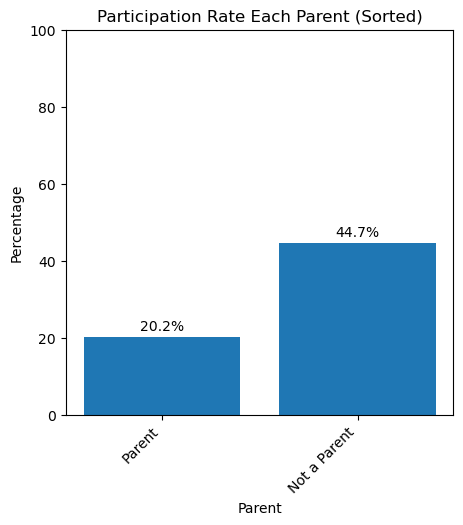

In [305]:
plot_participation_rate('Parent')

The customer who is `Not a Parent` has the highest participation rate with 45%

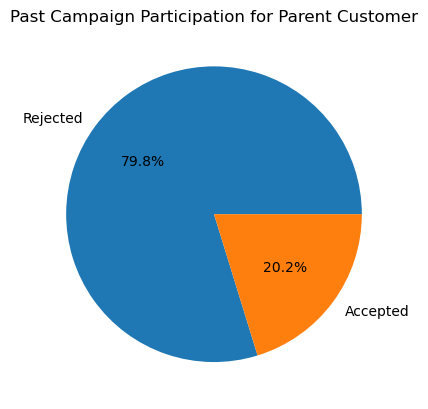

In [306]:
participation_counts = df[df['Parent'] == 'Parent']['Past_Campaign_Participation'].value_counts()

plt.pie(participation_counts, labels=participation_counts.index, autopct='%1.1f%%')
plt.title('Past Campaign Participation for Parent Customer')
plt.show()

Only **20%** of people which is a `Parent` had participated in the campaign

## Purchase Channel

In [307]:
channel = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
channel

NumWebPurchases         9147
NumCatalogPurchases     5962
NumStorePurchases      12967
dtype: int64

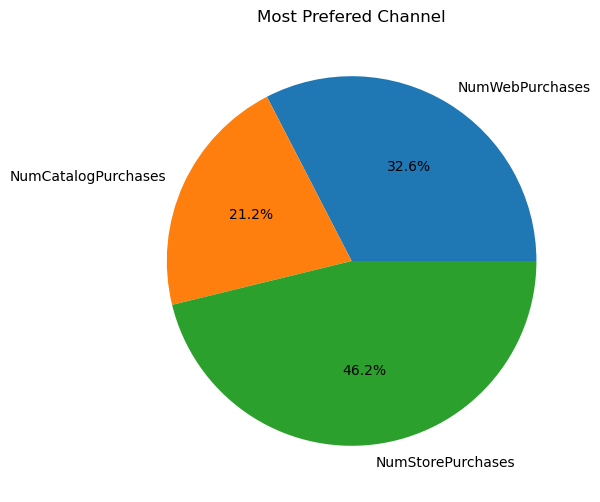

In [308]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(channel, labels=channel.index, autopct='%1.1f%%')
plt.title('Most Prefered Channel')
plt.show()

Store purchase is the most prefered channel of purchase with 46% rate

# Insights

## Conclusion

Based on the proportion acceptance rate of the past campaign is as follows:

- Generation : Silent Generation (46%)
- Education : PhD (33%)
- Marital Status : Widow (35%)
- Income Group : Upper Middle Class (60%)
- Parent : Not a Parent (45%)

While the top demographic of the total customers is as follows:

- Generation : Generation X (48%)
- Education : Graduation (50%)
- Marital Status : Couples (65%) (Married(39%) + Together(26%))
- Income Group : Lower Middle Class (68%)
- Parent : Parent (72%)

And the campaign acceptance rate for the top demographic is as follows:

- Generation : Generation X (24%)
- Education : Graduation (27%)
- Marital Status : Couples (25%)
- Income Group : Lower Middle Class (23%)
- Parent : Parent (20%)

The acceptance rate of the top demographic is very low


The most prefered channel of purchase is through stores and seconded by web.


## Recommendation

Based on the analysis conducted, we recommend targeting the Generation X demographic with a Graduation education level, specifically focusing on couples within the Lower Middle Class income group who are also parents.

For the upcoming campaign, the primary channel should be in-store, with the web serving as a secondary channel.